# <h3 align="center">__Module 2 Activity__</h3>
# <h3 align="center">__Assigned at the start of Module 2__</h3>
# <h3 align="center">__Due at the end of Module 2__</h3><br>



# Weekly Discussion Forum Participation

Each week, you are required to participate in the module’s discussion forum. The discussion forum consists of the week's Module Activity, which is released at the beginning of the module. You must complete/attempt the activity before you can post about the activity and anything that relates to the topic. 

## Grading of the Discussion

### 1. Initial Post:
Create your thread by **Day 5 (Saturday night at midnight, PST).**

### 2. Responses:
Respond to at least two other posts by **Day 7 (Monday night at midnight, PST).**

---

## Grading Criteria:

Your participation will be graded as follows:

### Full Credit (100 points):
- Submit your initial post by **Day 5.**
- Respond to at least two other posts by **Day 7.**

### Half Credit (50 points):
- If your initial post is late but you respond to two other posts.
- If your initial post is on time but you fail to respond to at least two other posts.

### No Credit (0 points):
- If both your initial post and responses are late.
- If you fail to submit an initial post and do not respond to any others.

---

## Additional Notes:

- **Late Initial Posts:** Late posts will automatically receive half credit if two responses are completed on time.
- **Substance Matters:** Responses must be thoughtful and constructive. Comments like “Great post!” or “I agree!” without further explanation will not earn credit.
- **Balance Participation:** Aim to engage with threads that have fewer or no responses to ensure a balanced discussion.

---

## Avoid:
- A number of posts within a very short time-frame, especially immediately prior to the posting deadline.
- Posts that complement another post, and then consist of a summary of that.


# __1. Module 2__<br>

A covariance matrix is a square matrix that captures the pairwise covariance between multiple features in a dataset. Each element $C[i,j]$ represents the covariance between the $i$-th and $j$-th features. Diagonal elements represent variances of individual features.

Why is it Important?

* Multivariate Relationships: It helps understand how features move together (positive/negative correlation).
* Dimensionality Reduction: It's the foundation of techniques like Principal Component Analysis (PCA).
* Data Representation: Useful for understanding the structure of multivariate data in fields like finance, image processing, and machine learning.

## Covariance Equation

The covariance between two variables $X_i$ and $X_j$ over $n$ observations is given by:

$$C_{i,j} = \frac{1}{n-1} \sum_{k=1}^{n} (X_{ki} - \mu_i)(X_{kj} - \mu_j)$$

where,
*  $X_{ki}$  and $ X_{kj}$ are values of variables $X_i$ and $X_j$ for the $k$-th observation.
*   $\mu_i$  and  $\mu_j$ are the means of $X_i$ and $X_j$, respectively.
*   $n$ is the total number of observations.


## Covariance Matrix Representation

For a dataset with $d$ features, the covariance matrix $C$ is represented as:

\begin{bmatrix}
C_{1,1} & C_{1,2} & C_{1,3} & \dots  & C_{1,d} \\
C_{2,1} & C_{2,2} & C_{2,3} & \dots  & C_{2,d} \\
C_{3,1} & C_{3,2} & C_{3,3} & \dots  & C_{3,d} \\
\vdots  & \vdots  & \vdots  & \ddots & \vdots  \\
C_{d,1} & C_{d,2} & C_{d,3} & \dots  & C_{d,d} \\
\end{bmatrix}


This represents a $ d \times $ symmetric matrix, where each element $C_{i,j}$ is the covariance between the variables $X_i$ and $X_j$.



### Without using any Python packages like `numpy` or `pandas`, write a function to calculate the covariance matrix for a given dataset. 

In [2]:
def compute_covariance_matrix(data):
    """
    Compute the covariance matrix for a given dataset.
    Input: data - A 2D list where each inner list is a variable (e.g., [[X], [Y]])
    Output: Covariance matrix as a 2D list
    """

    # Initialize variables
    number_of_vars = len(data)
    number_of_observations = len(data[0])
    cov_matrix = [[0.0 for _ in range(number_of_vars)] for _ in range(number_of_vars)]
    means = []
    for var in data:
        mean = sum(var) / len(var)
        means.append(mean)
    
    for row_index in range(number_of_vars):
        for column_index in range(number_of_vars):
            # Calculate covariance for [row_index][column_index]
            covariance = 0.0
            for observation_index in range(number_of_observations):
                # for each [row_index][column_index] use the observation index to and mean to calculate covariance
                covariance += (data[row_index][observation_index] - means[row_index]) * (data[column_index][observation_index] - means[column_index])
            
            # divide by n-1 for covariance
            cov_matrix[row_index][column_index] = covariance / (number_of_observations - 1)
    
    return cov_matrix

### Use your new covariance matrix function to compute the covariance matrix of the first 5 rows of the iris dataset. 

In [3]:
from sklearn.datasets import load_iris
import numpy as np

# Load the Iris dataset
iris = load_iris()

# iris is a Bunch object, similar to a dictionary, containing data and metadata
# The features (measurements) of the Iris dataset are stored in 'data'
iris_data = iris.data

# The labels (species of each instance) are stored in 'target'
iris_labels = iris.target

# The names of the features and labels are also stored
feature_names = iris.feature_names
label_names = iris.target_names

# To see the shape of the dataset
print("Data shape:", iris_data.shape)  # e.g., (150, 4)
print("Labels shape:", iris_labels.shape)  # e.g., (150,)

# If you want to see the first few entries
print("First 5 rows of data:\n", iris_data[:5])
print("First 5 labels:", iris_labels[:5])
print("Feature names:", iris.feature_names)



Data shape: (150, 4)
Labels shape: (150,)
First 5 rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First 5 labels: [0 0 0 0 0]
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

columns = iris_data[:5].T.tolist()
cov_matrix = compute_covariance_matrix(columns)

standard_deviation_first_feature = np.sqrt(cov_matrix[0][0])
standard_deviation_second_feature = np.sqrt(cov_matrix[1][1])
standard_deviation_third_feature = np.sqrt(cov_matrix[2][2])
standard_deviation_fourth_feature = np.sqrt(cov_matrix[3][3])
print(f"Standard Deviation of {iris.feature_names[0]}: {standard_deviation_first_feature}")
print(f"Standard Deviation of {iris.feature_names[1]}: {standard_deviation_second_feature}")
print(f"Standard Deviation of {iris.feature_names[2]}: {standard_deviation_third_feature}")
print(f"Standard Deviation of {iris.feature_names[3]}: {standard_deviation_fourth_feature}")

print("Covariance Matrix:")
covariance_data_frame = pd.DataFrame(cov_matrix, index=feature_names, columns=feature_names)

covariance_data_frame.head()

Standard Deviation of sepal length (cm): 0.2073644135332772
Standard Deviation of sepal width (cm): 0.2588435821108957
Standard Deviation of petal length (cm): 0.07071067811865474
Standard Deviation of petal width (cm): 0.0
Covariance Matrix:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.0430,0.0365,-0.0025,0.0
sepal width (cm),0.0365,0.0670,-0.0025,0.0
petal length (cm),-0.0025,-0.0025,0.0050,0.0
petal width (cm),0.0000,0.0000,0.0000,0.0


## Relationships

One thing that is obvious is that the last row and col of our covariance matrix is all zeros, we can see that this should be the case by noticing that all the values of petal width (fourth feature) are all equal, meaning that there is no difference between them, in other words, no variance or covariance.

Looking at our variances we can see that our features are all tightly clusted around their means as there variance is low for all our features. The positive covariance between sepal length and sepal width(0.0365) suggests that they are both increasing together, while petal length has negative covariances with sepal length and sepal width(-0.0025). A negative covariance means one the these features is diverging, one is increasing while another is decreasing. This number is low though so there is a weak correlation here.


### 

### Plot data points for 2 of the features in the dataset and show how the covariance matrix reflects the orientation and spread of data.

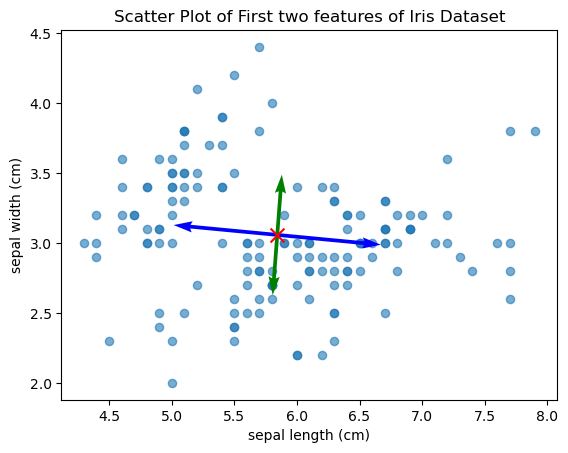

Standard Deviation of sepal length (cm): 0.8280661279778629
Standard Deviation of sepal width (cm): 0.435866284936698
corelation from covaraince -0.04243400447427291 is -0.11756978413300208
Covariance Matrix:


,sepal length (cm),sepal width (cm)
sepal length (cm),0.685694,-0.042434
sepal width (cm),-0.042434,0.189979


In [5]:
# Create plots here
# get first 2 colums of iris data
iris_data_first_feature = iris_data[:, 0]
iris_data_second_feature = iris_data[:, 1]

covariance_matrix = compute_covariance_matrix([iris_data_first_feature, iris_data_second_feature])

covariance_data_frame = pd.DataFrame(covariance_matrix, index=feature_names[:2], columns=feature_names[:2])

standard_deviation_first_feature = np.sqrt(covariance_matrix[0][0])
standard_deviation_second_feature = np.sqrt(covariance_matrix[1][1])

# plot the data
plt.scatter(iris_data_first_feature, iris_data_second_feature, alpha=0.6, s=35)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Scatter Plot of First two features of Iris Dataset")

# plot the point of the mean 
mean_first_feature = np.mean(iris_data_first_feature)
mean_second_feature = np.mean(iris_data_second_feature)

# plot principal directions using eigen vectors
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
# plot the eigen vectors
plt.quiver(mean_first_feature, mean_second_feature, eigen_vectors[0][0] * np.sqrt(eigen_values[0]), eigen_vectors[1][0] * np.sqrt(eigen_values[0]), color='blue', angles='xy', scale_units='xy', scale=1)
plt.quiver(mean_first_feature, mean_second_feature, -eigen_vectors[0][0] * np.sqrt(eigen_values[0]), -eigen_vectors[1][0] * np.sqrt(eigen_values[0]), color='blue', angles='xy', scale_units='xy', scale=1)
plt.quiver(mean_first_feature, mean_second_feature, eigen_vectors[0][1] * np.sqrt(eigen_values[1]), eigen_vectors[1][1] * np.sqrt(eigen_values[1]), color='green', angles='xy', scale_units='xy', scale=1)
plt.quiver(mean_first_feature, mean_second_feature, -eigen_vectors[0][1] * np.sqrt(eigen_values[1]), -eigen_vectors[1][1] * np.sqrt(eigen_values[1]), color='green', angles='xy', scale_units='xy', scale=1)
plt.scatter(mean_first_feature, mean_second_feature, color='red', marker='x', s=100)


plt.show()
print(f"Standard Deviation of {iris.feature_names[0]}: {standard_deviation_first_feature}")
print(f"Standard Deviation of {iris.feature_names[1]}: {standard_deviation_second_feature}")

# coorelation of covariance()
corelation = covariance_matrix[0][1] / (standard_deviation_first_feature * standard_deviation_second_feature)
print(f"corelation from covaraince {covariance_matrix[0][1]} is {corelation}")


print("Covariance Matrix:")
covariance_data_frame.head()



We can see from our covariance matrix that the standard deviations for our x axis (sepal length) is roughtly double the standard deviation of our y axis. This is reflected in our graph as we can see that the sepal width is less "spread out" than our sepial length by roughly half. The -0.042434 covariance means that as sepal length increases sepal width tends to decrease, with a weak correlation. 

# References
[1] Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest, and Clifford Stein. Introduction to
Algorithms, Third Edition. MIT Press and McGraw-Hill, 2009. ISBN-13: 978-0-262-03384-8<br><br>